In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') 

### 1. Import Dataset

In [22]:
data = pd.read_csv("TCGA_InfoWithGrade.csv")
data

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
data.shape

(839, 24)

In [24]:
data.dtypes

Grade                 int64
Gender                int64
Age_at_diagnosis    float64
Race                  int64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object

### 2. Clean Dataset

In [25]:
data.isna().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

In [26]:
# finding duplicates
# So there two duplicaates here, of which, we decided to keep the first instance of each duplicate record. 
# False would eliminate all the records leading to loss of information
data = data.drop_duplicates(keep = "first")
data.shape

(838, 24)

In [27]:
# Closer the std to mean, states that the data is centered around mean
# 50% - The 50th percentile is the median of the dataset 
# If the mean is equal to median then the data is symmetric and no significant skewness
# If the mean > median, the data is rightly skewed and if median> mean, the data is left skewed
# We can overall get an idea of data distribution and understand what tranformations to conduct or not to conduct
data.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,0.420048,0.418854,50.954212,0.107399,0.480907,0.414081,0.257757,0.168258,0.133652,0.132458,...,0.053699,0.047733,0.045346,0.034606,0.032220,0.032220,0.032220,0.027446,0.027446,0.026253
std,0.493861,0.493666,15.702264,0.369594,0.499934,0.492857,0.437660,0.374318,0.340481,0.339191,...,0.225558,0.213327,0.208186,0.182889,0.176688,0.176688,0.176688,0.163477,0.163477,0.159982
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.555000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.815000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Exploaratory Data Analysis 


In [28]:
data__ = data.copy()

#### 1. Conducting Correlation

<AxesSubplot:title={'center':'Feature Correlation'}>

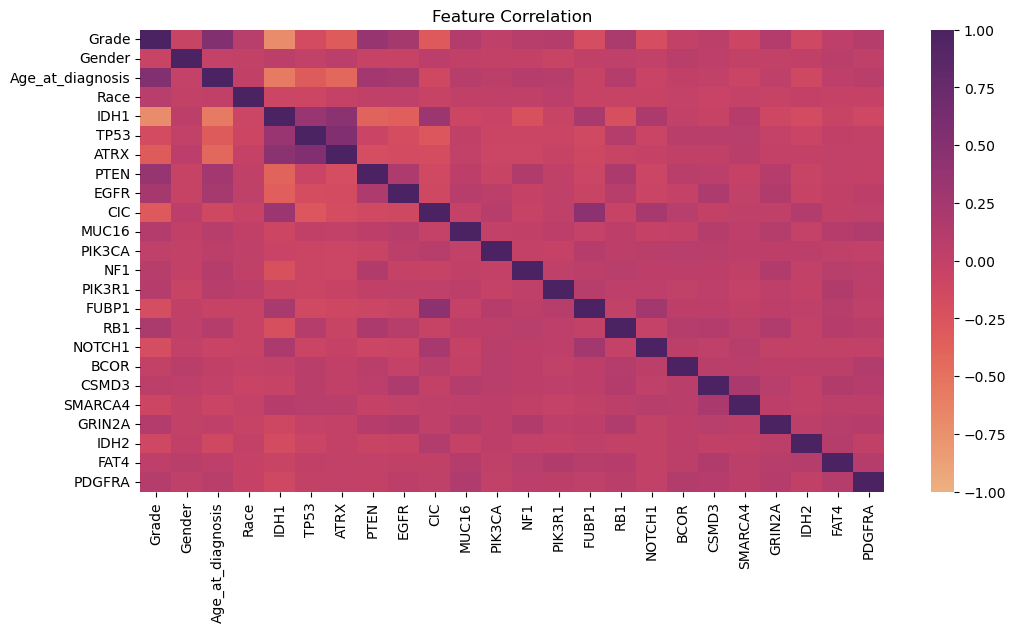

In [29]:
plt.figure(figsize = (12,6))
data_correlation = sns.heatmap(data__.corr(), vmin=-1, vmax=1, cmap= 'flare')
data_correlation.set_title('Feature Correlation', )
data_correlation

#### 2. Data Visualization

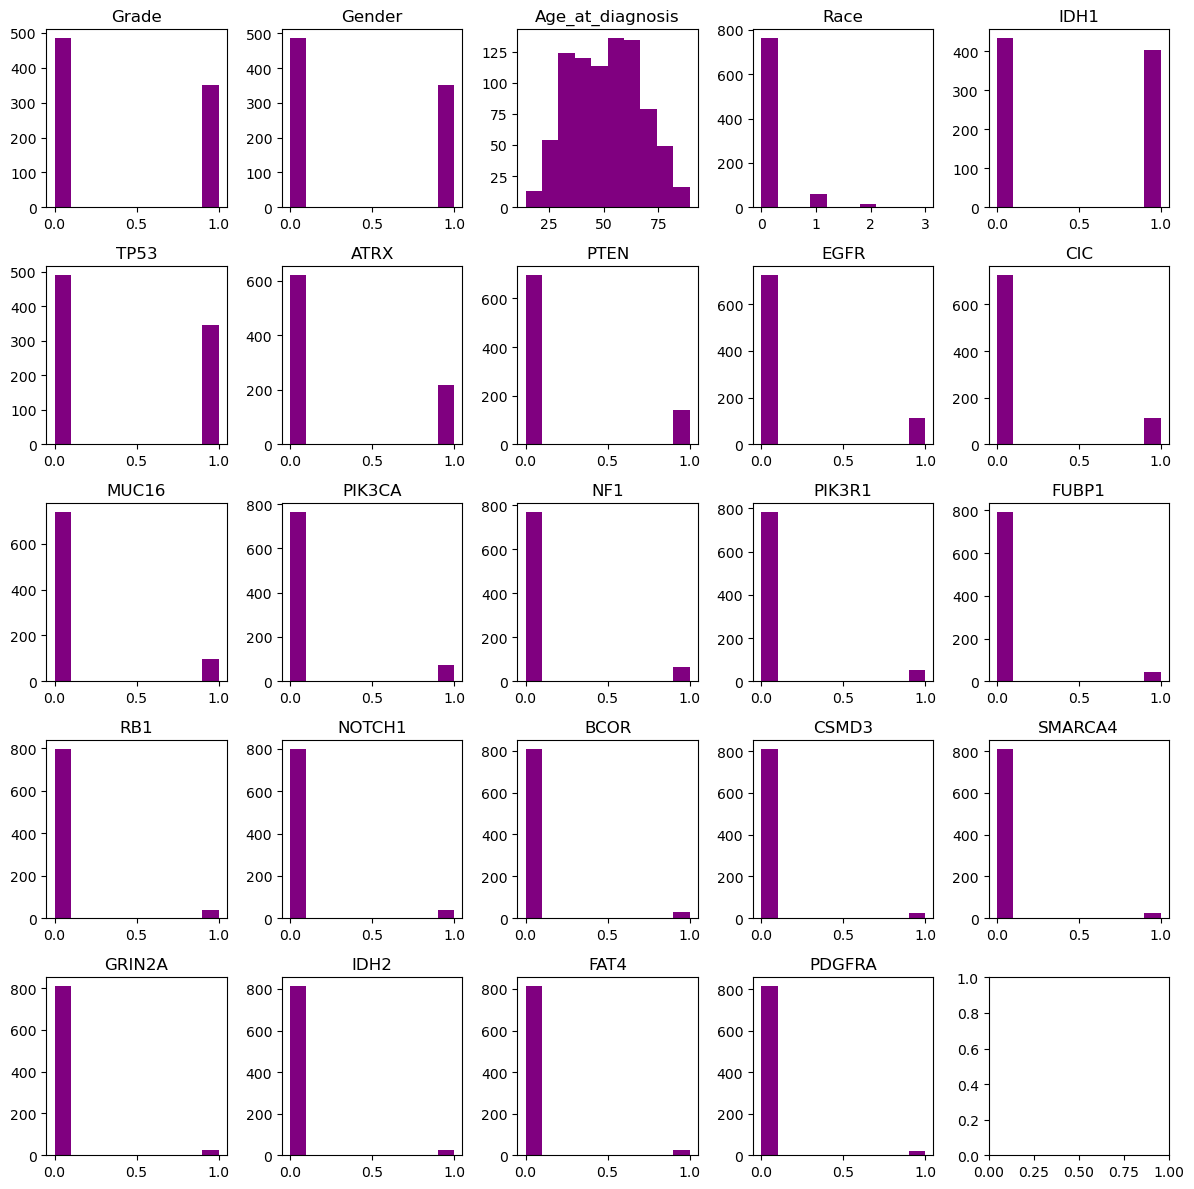

In [30]:
fig, axs = plt.subplots(5,5, figsize = (12,12))
axs = axs.flatten()

for i, column in enumerate (data__.columns):
    axs[i].hist(data__[column], color = "Purple", bins = 10)
    axs[i].set_title(column)
     
plt.tight_layout()
plt.show()
                  
    

#### 3.a. Normalizing Age using MinMax Scaler

In [31]:
# Obtaining age column from dataframe fetches a pandas series. However, the MinMax Scaler expects a 2-D array
age_normal_series = data__["Age_at_diagnosis"]
# The reshape method applies for NumPy array. So we converted the series to NumPy array using values method
age_normal_numpy = age_normal_series.values
# Reshaping the NumPy array to 2D by reshaping the array
age_normal_reshaped = age_normal_numpy.reshape(-1, 1)


normalize = MinMaxScaler()
normalized_age = normalize.fit_transform(age_normal_reshaped)
normalized_age


array([[0.49258715],
       [0.32456258],
       [0.27714705],
       [0.24522506],
       [0.22826232],
       [0.25096835],
       [0.27741418],
       [0.40376653],
       [0.26098571],
       [0.96941365],
       [0.50060104],
       [0.53212235],
       [0.50981702],
       [0.43969547],
       [0.2663283 ],
       [0.34873781],
       [0.5281154 ],
       [0.35755309],
       [0.38760518],
       [0.30746627],
       [0.44143182],
       [0.22171764],
       [0.14825698],
       [0.70014692],
       [0.56444504],
       [0.28809937],
       [0.50180313],
       [0.30279151],
       [0.5353279 ],
       [0.23761186],
       [0.67663951],
       [0.38653666],
       [0.49071724],
       [0.38987578],
       [0.14919193],
       [0.40937625],
       [0.48083344],
       [0.17403499],
       [0.52450915],
       [0.42700681],
       [0.13663684],
       [0.2640577 ],
       [0.20195005],
       [0.4129825 ],
       [0.63884066],
       [0.42994524],
       [0.29731535],
       [0.642

#### 3.b Replacing the normalized age column in the dataset

In [32]:
data__["Age_at_diagnosis"] = normalized_age
data__

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,0.492587,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0.324563,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.277147,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0.245225,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0.228262,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,0.847736,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,0.945105,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,0.842393,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,0.653266,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


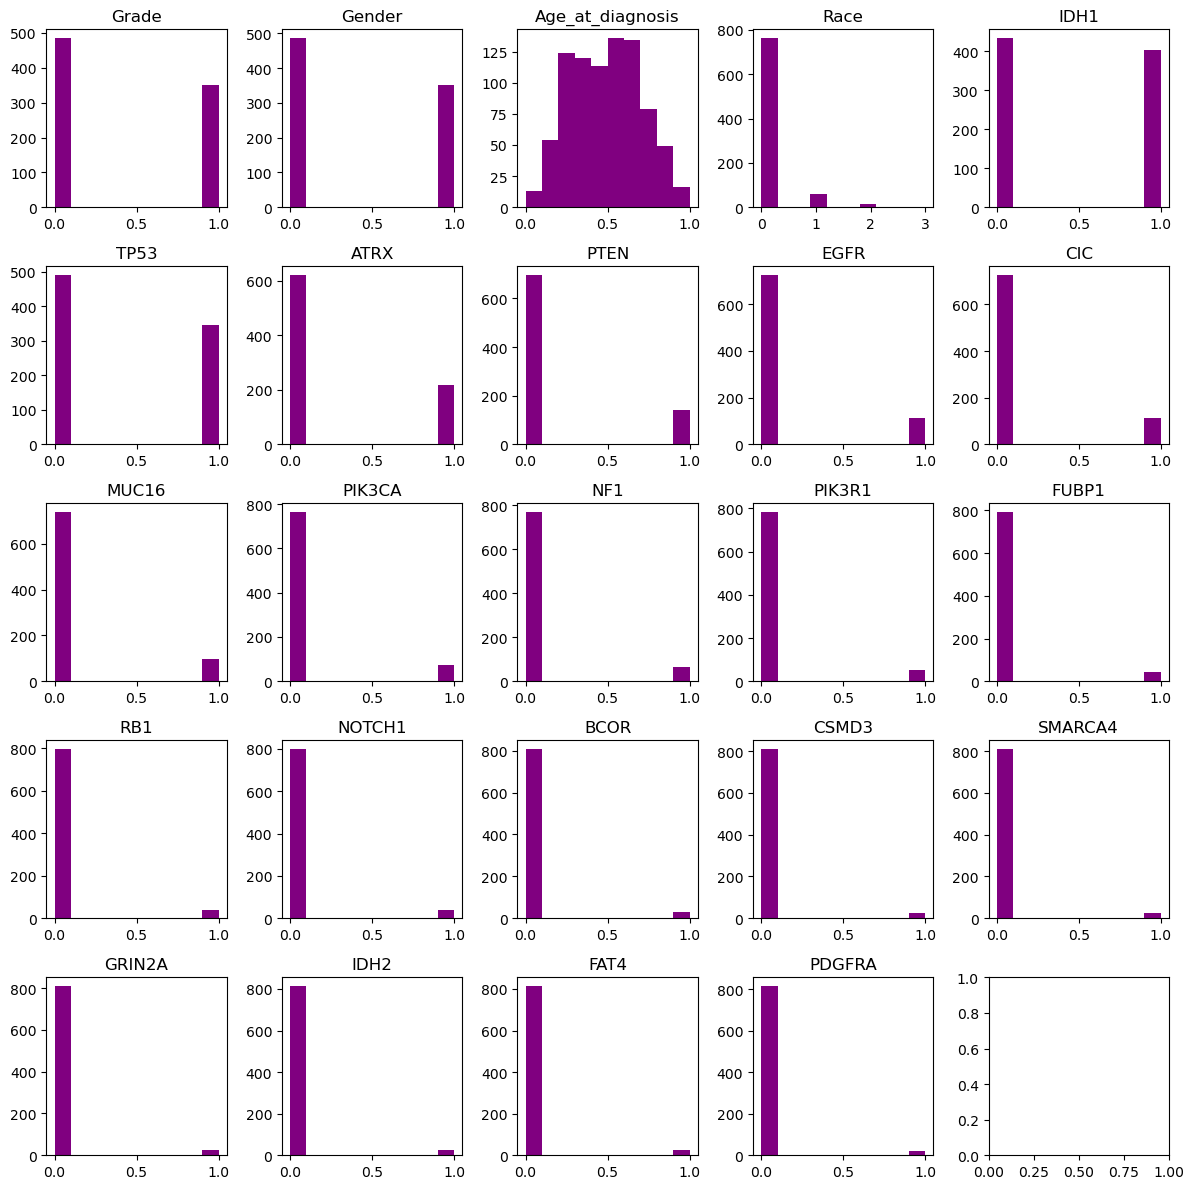

In [33]:
fig, axs = plt.subplots(5,5, figsize = (12,12))
axs = axs.flatten()

for i, column in enumerate(data__.columns):
    axs[i].hist(data__[column], color = "Purple", bins = 10)
    axs[i].set_title(column)
    
plt.tight_layout()
plt.show()

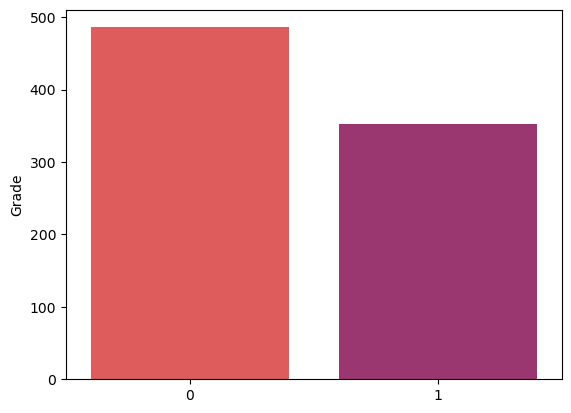

In [34]:
diagnosis_distribution = data['Grade'].value_counts()
barplot = sns.barplot(x=diagnosis_distribution.index, y=diagnosis_distribution, palette="flare", saturation= 1.5,dodge= False)

In [35]:
data = data__.copy()

### 4. Train/Test Split

In [36]:
X = data.iloc[:, 1:]
y = data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = True, stratify = y)

### 5. Create a model to evaluate on dataset- Logistic Regression

0.8618876941457586
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       146
           1       0.80      0.90      0.84       106

    accuracy                           0.86       252
   macro avg       0.86      0.87      0.86       252
weighted avg       0.87      0.86      0.86       252

{'C': 1, 'max_iter': 50, 'random_state': 0}
LogisticRegression(C=1, max_iter=50, random_state=0)


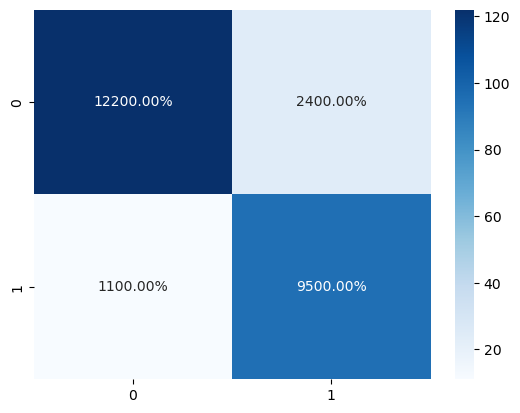

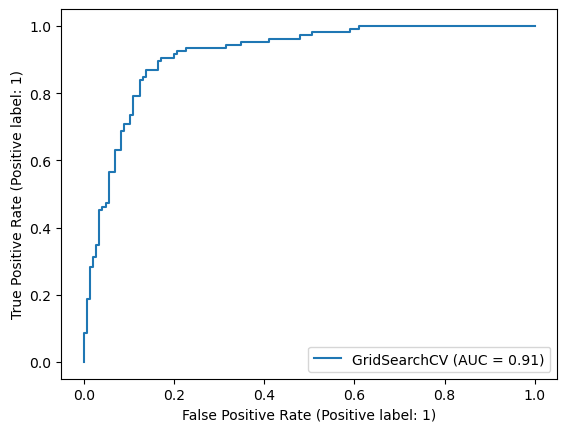

In [39]:
# Initializing Logistic Regression Classifier
lr_clf = LogisticRegression(penalty= 'l2', solver= 'lbfgs' )

param_grid = {'C': [0.1, 1, 10, 100], 'random_state': [0,42,62,82,100], 'max_iter': [50, 100, 200]}

grid_search = GridSearchCV(lr_clf, param_grid= param_grid,scoring='f1', cv= 5, refit= True)

# Training the classifier on all features
grid_search.fit(X_train, y_train)

# Making predictions
y_test_pred = grid_search.predict(X_test)

# Evaluating model based on f1_score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f1)

# Creating a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_sb = sns.heatmap(conf_matrix, annot=True, 
            fmt='.2%', cmap='Blues')

# Plotting the model evaluation report
model_report = classification_report(y_test, y_test_pred)
print(model_report)

# Plotting a AUC
metrics.plot_roc_curve(grid_search, X_test, y_test) 

# Obtaining the best parameter and estimators of the model
print(grid_search.best_params_)
print(grid_search.best_estimator_)